# Class 6: Intro to Machine Learning Methods applied to text

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm

We will be using a dataset on book reviews. This dataset originates from Kaggle ([Amazon Books Reviews](https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews)). The key difference in our usage is that we have removed most of the reviews from the original dataset to reduce its size.
 

In [2]:
df = pd.read_csv("Text_as_data/Data/Class6/book_reviews.csv")

In [3]:
df.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review_positive_help,review_tot_help
0,0802841899,The Church of Christ: A Biblical Ecclesiology ...,25.97,ARI272XF8TOL4,Christopher J. Bray,74/81,5.0,955411200,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...,74,81
1,0974289108,The Ultimate Guide to Law School Admission: In...,14.95,A1KZ0RDJZQSY4O,sayock,27/29,3.0,1090368000,No &quot;Insider&quot; Secrets,If you are someone who is fairly new to the la...,27,29
2,0809080699,The Repeal of Reticence: A History of America'...,NaN,A18YY5TBNSDW3O,Bartleby,29/29,5.0,899164800,Great treatment of the defeat of reticence by ...,"Using a quiet, restrained writing style that i...",29,29
3,B000NKGYMK,Alaska Sourdough,NaN,NaN,NaN,36/37,5.0,949104000,Real Alaskan Sourdough,Ruth Allman has written an excellent book abou...,36,37
4,B000NKGYMK,Alaska Sourdough,NaN,AC58Z72OB2DDX,Gary W. Marian,29/30,5.0,945734400,True Alaskan cooking,"I have been using this book since 1988, the ei...",29,30


In [4]:
len(df)

224683

In [5]:
df.columns

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text',
       'review_positive_help', 'review_tot_help'],
      dtype='object')

In [6]:
df.describe(include='all')

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review_positive_help,review_tot_help
count,224683,224673,45867.000000,176946,176937,224683,224683.000000,2.246830e+05,224669,224683,224683.000000,224683.000000
unique,49352,46401,NaN,92902,86883,11851,NaN,NaN,155378,168056,NaN,NaN
top,B0006IU3ZS,Atlas Shrugged,NaN,A1K1JW1C5CUSUZ,A Customer,20/21,NaN,NaN,Disappointing,While cultural pundits try to convince you tha...,NaN,NaN
freq,1947,2012,NaN,331,395,1880,NaN,NaN,384,63,NaN,NaN
mean,NaN,NaN,20.245765,NaN,NaN,NaN,3.357201,1.057029e+09,NaN,NaN,33.315471,48.340760
std,NaN,NaN,23.913877,NaN,NaN,NaN,1.719881,9.673074e+07,NaN,NaN,55.717389,62.609799
min,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,8.139744e+08,NaN,NaN,0.000000,21.000000
25%,NaN,NaN,10.870000,NaN,NaN,NaN,1.000000,9.728640e+08,NaN,NaN,14.000000,25.000000
50%,NaN,NaN,14.560000,NaN,NaN,NaN,4.000000,1.056154e+09,NaN,NaN,23.000000,34.000000
75%,NaN,NaN,22.650000,NaN,NaN,NaN,5.000000,1.124237e+09,NaN,NaN,36.000000,51.000000


In [7]:
df = df.dropna(subset=['User_id'])


The `review_tot_help` attribute indicates the total number of times a review has been voted on, regardless of the nature of the vote. On the other hand, the `review_positive_help` attribute specifies the number of times a review has been voted as being helpful.


In [8]:
def convert_to_date(timestamp):
    return datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')

# Applying the function to the "review/time" column
df['review/time'] = df['review/time'].apply(convert_to_date)

In [9]:
df.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review_positive_help,review_tot_help
0,0802841899,The Church of Christ: A Biblical Ecclesiology ...,25.97,ARI272XF8TOL4,Christopher J. Bray,74/81,5.0,2000-04-10 20:00:00,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...,74,81
1,0974289108,The Ultimate Guide to Law School Admission: In...,14.95,A1KZ0RDJZQSY4O,sayock,27/29,3.0,2004-07-20 20:00:00,No &quot;Insider&quot; Secrets,If you are someone who is fairly new to the la...,27,29
2,0809080699,The Repeal of Reticence: A History of America'...,NaN,A18YY5TBNSDW3O,Bartleby,29/29,5.0,1998-06-29 20:00:00,Great treatment of the defeat of reticence by ...,"Using a quiet, restrained writing style that i...",29,29
4,B000NKGYMK,Alaska Sourdough,NaN,AC58Z72OB2DDX,Gary W. Marian,29/30,5.0,1999-12-20 19:00:00,True Alaskan cooking,"I have been using this book since 1988, the ei...",29,30
5,B000NKGYMK,Alaska Sourdough,NaN,A3CNQIKVTG9QYO,MERRIBETH NORD,25/28,5.0,2001-02-23 19:00:00,Cheechako to Sourdough in 190 Pages,"My poor dogeared, stained copy of this book ca...",25,28


In [10]:
df.User_id.value_counts()

User_id
A1K1JW1C5CUSUZ    331
A14OJS0VWMOSWO    296
A3QVAKVRAH657N    286
A1D2C0WDCSHUWZ    265
ACIBQ6BQ6AWEV     245
                 ... 
ADNKR9VNRI5YC       1
AATR20LGGAAR0       1
A3V9QMIL483A16      1
AU5XV2HWUFLY1       1
AC2LQLRZDCW         1
Name: count, Length: 92902, dtype: int64

### Prepare the data and inspect
Clean, vectorize, see the distribution of scores, and usefulness, create variable experience by reviewer

From ChatGPT:
```
I have a df containing reviews. These reviews have a "User_id" and a "review/time". 
I want to create a review_n variable that counts the review number by reviewer_ID in 
sequence, where they are ordered from the first one to the last one
```

In [11]:
# First, ensure the DataFrame is sorted by User_id and review/time
df = df.sort_values(by=['User_id', 'review/time'])

# Then, use groupby and cumcount to create the review_n variable
df['review_n'] = df.groupby('User_id').cumcount() + 1

In [12]:
df['review_n'].describe()

count    176946.000000
mean          7.053638
std          20.275453
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max         331.000000
Name: review_n, dtype: float64

In [13]:
df['total_reviews'] = df.groupby('User_id')['User_id'].transform('count')

df.loc[df['total_reviews']>10].head(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review_positive_help,review_tot_help,review_n,total_reviews
139495,1556857489,Miss Marjoribanks (Classic Books on Cassettes ...,42.99,A106016KSI0YQ,Jay Dickson,37/37,4.0,2000-10-31 19:00:00,Funny and fetching,If you were to cross Jane Austen's Emma Woodho...,37,37,1,32
54681,0575015799,House and Its Head,NaN,A106016KSI0YQ,Jay Dickson,63/67,5.0,2001-02-19 19:00:00,Another gem from the NYRB Press,I'm beginning to become addicted to these litt...,63,67,2,32
86915,B0006AMXG8,"A house and its head,",NaN,A106016KSI0YQ,Jay Dickson,63/67,5.0,2001-02-19 19:00:00,Another gem from the NYRB Press,I'm beginning to become addicted to these litt...,63,67,3,32
33852,0575027061,Manservant and Maidservant,NaN,A106016KSI0YQ,Jay Dickson,22/24,4.0,2001-04-24 20:00:00,A one-of-a-kind author,No one writes novels quite like Ivy Compton-Bu...,22,24,4,32
63373,0679749853,"Queen's Throat: Opera, Homosexuality, and the ...",NaN,A106016KSI0YQ,Jay Dickson,31/39,2.0,2001-04-26 20:00:00,Tediously whimsical,There's no denying that Wayne Koestenbaum is a...,31,39,5,32
44765,0192853961,The French Revolution: A Very Short Introduction,9.56,A106016KSI0YQ,Jay Dickson,44/44,5.0,2001-11-17 19:00:00,Extraordinarily successful for what it sets ou...,Many relatively recent books on the French Rev...,44,44,6,32
201721,B000Q9M7UQ,Sleepless Nights: A Novel,NaN,A106016KSI0YQ,Jay Dickson,20/21,4.0,2002-01-19 19:00:00,"Evocative, beautiful, thin",This small novella from NYRB is a much-lauded ...,20,21,7,32
73067,031764159X,The Stones of Florence,NaN,A106016KSI0YQ,Jay Dickson,30/31,4.0,2002-06-26 20:00:00,"After an irritating start, a real pleasure",In the first chapter of THE STONES OF FLORENCE...,30,31,8,32
192138,B000IN33YO,The World of Venice,NaN,A106016KSI0YQ,Jay Dickson,42/45,3.0,2002-06-26 20:00:00,Not Morris's best,Although I am an enormous fan of Morris's late...,42,45,9,32
54007,B000IT5E4U,THE WORLD OF ODYSSEUS,NaN,A106016KSI0YQ,Jay Dickson,19/22,5.0,2002-09-29 20:00:00,A work of classical scholarship that is TRULY ...,Moses Finley's WORLD OF ODYSSEUS is that rares...,19,22,10,32


In [14]:
df['helpfulness'] = df['review_positive_help']/df['review_tot_help']
df['len'] = df['review/text'].str.split(" ").apply(len)

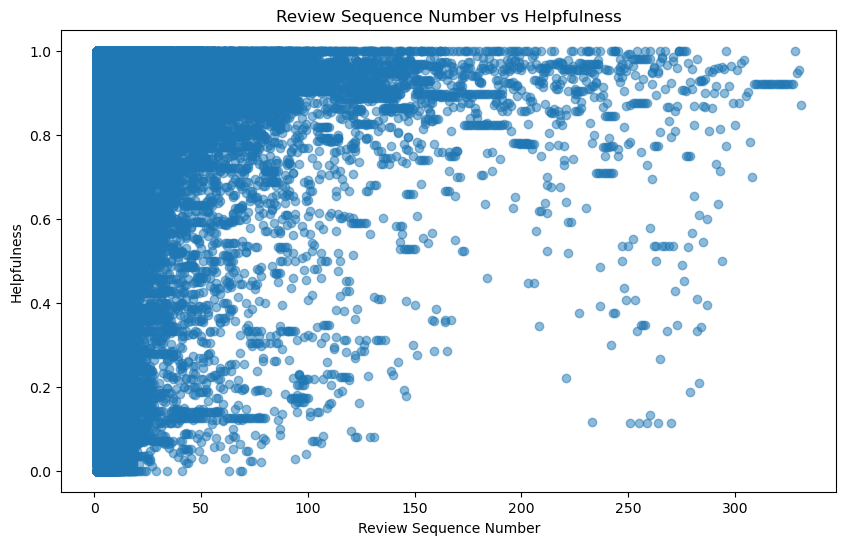

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Sets the figure size
plt.scatter(df['review_n'], df['helpfulness'], alpha=0.5)  # Creates the scatter plot with some transparency
plt.title('Review Sequence Number vs Helpfulness')  # Adds a title to the plot
plt.xlabel('Review Sequence Number')  # Names the x-axis
plt.ylabel('Helpfulness')  # Names the y-axis
plt.show()  # Displays the plot


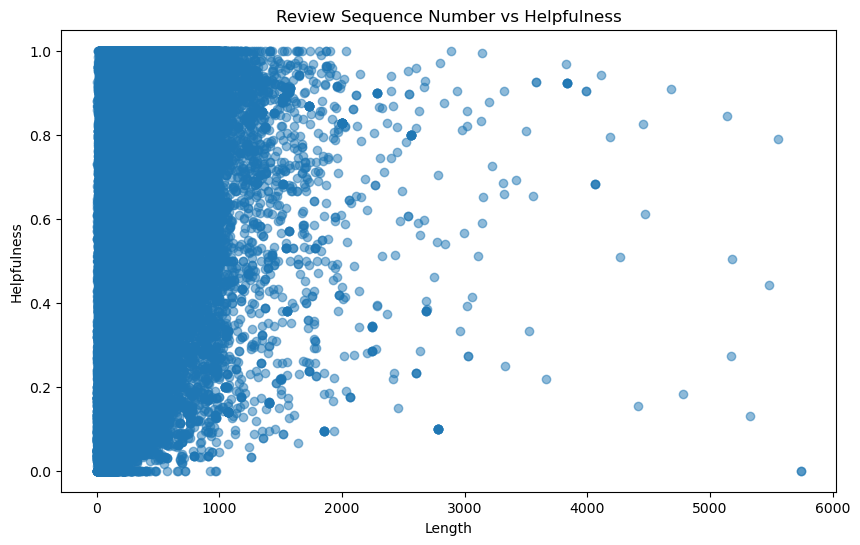

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Sets the figure size
plt.scatter(df['len'], df['helpfulness'], alpha=0.5)  # Creates the scatter plot with some transparency
plt.title('Review Sequence Number vs Helpfulness')  # Adds a title to the plot
plt.xlabel('Length')  # Names the x-axis
plt.ylabel('Helpfulness')  # Names the y-axis
plt.show()  # Displays the plot


### Regressions

0. create test, train  set 
1. reviews by reviewer: are these more useful? 
2. Fit a linear regression

In [17]:
#Create a training and a test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [18]:
Xtrain = train[[ 'review_n', 'len']]
Ytrain = train['helpfulness']

Xtrain.head()

,review_n,len
34596,1,356
179562,1,203
84690,5,483
185215,1,167
170514,1,33


In [19]:
Ytrain.head()

34596     0.921569
179562    0.621622
84690     0.857143
185215    0.932417
170514    0.820000
Name: helpfulness, dtype: float64

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(Xtrain, Ytrain)
lin_reg.coef_

array([0.00100135, 0.00023358])

In [21]:
#For reference, we can use statsmodels
model = sm.OLS(Ytrain, sm.add_constant(Xtrain)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            helpfulness   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     3249.
Date:                Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:40:59   Log-Likelihood:                -28143.
No. Observations:              141556   AIC:                         5.629e+04
Df Residuals:                  141553   BIC:                         5.632e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6229      0.001    542.031      0.0

In [22]:
# in-sample performance
from sklearn.metrics import mean_squared_error
Ytrain_pred = lin_reg.predict(Xtrain)
train_mse = mean_squared_error(Ytrain,Ytrain_pred)
train_mse

0.0871390095383574

In [23]:
# out-of-sample performance
Xtest = test[['review_n', 'len']]
Ytest = test['helpfulness']
Ytest_pred = lin_reg.predict(Xtest)
test_mse = mean_squared_error(Ytest,Ytest_pred)
test_mse

0.08613381387681507

### Move to text 
Now we want to see whether the text in the review predict its helpfulness

1. Linear regression, how well are we doing
2. Regularization
3. pipeline
4. Cross Validation to choose alpha - ridge and lasso

In [24]:
df.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review_positive_help,review_tot_help,review_n,total_reviews,helpfulness,len
65599,B0006ES228,The projection of the astral body (Collector's...,NaN,A100067J71SXWJ,Gloria Morrell,23/23,5.0,2000-04-11 20:00:00,Best Book on the Subject,I've had alot of conscious out-of-body experie...,23,23,1,2,1.000000,46
118672,B000N74OMU,Best Friends: the True Story of the World's Mo...,NaN,A100067J71SXWJ,Gloria Morrell,25/27,5.0,2001-12-03 19:00:00,This place is for real!!!!,I just loved this book!!! I have been a member...,25,27,2,2,0.925926,125
153664,0688140718,Trapped in the Mirror: Adult Children of Narci...,10.98,A1001L6GILDZB5,Margo Moon,31/34,5.0,2002-12-07 19:00:00,"If you only read one book on this subject, thi...",Whether you know that one or both parents are ...,31,34,1,1,0.911765,451
111576,1932225277,Setting the Record Straight: American History ...,8.95,A1003LA2SQR2QO,"D. C. Carr ""dccarr""",37/106,1.0,2010-10-13 20:00:00,Misleading waste of paper,"After reading other reviews, I was looking for...",37,106,1,1,0.349057,74
71919,B0009JKV7E,Confessions of an Economic Hitman,NaN,A1004HHMSDY5IP,"R. Harris ""Full of it""",12/27,2.0,2007-04-11 20:00:00,It's embarrassing to read,I read the reviews here and assumed that a rig...,12,27,1,1,0.444444,137


In [25]:
df.loc[111576, "review/text"]

'After reading other reviews, I was looking forward to an informative account of overlooked Afro-American contributions to American history. What I got was a pro-Republican pro-Christian anti-Democrat diatribe.This is not an attempt to "set the record straight" - it\'s propaganda and a complete waste of time and paper.I very rarely throw away books even if I disagree with the author, but this is such trash that I threw my copy in the recycling bin.'

In [26]:
df.loc[65599, "review/text"]

"I've had alot of conscious out-of-body experiences in my life and read many books on the subject. This book really hit the nail on the head! The most detailed and accurate book on the subject with lots of exercises that really work! I recommend it highly!"

In [27]:
from gensim.parsing.preprocessing import preprocess_string
preprocess_string(df.loc[65599, "review/text"])


['alot',
 'consciou',
 'bodi',
 'experi',
 'life',
 'read',
 'book',
 'subject',
 'book',
 'hit',
 'nail',
 'head',
 'detail',
 'accur',
 'book',
 'subject',
 'lot',
 'exercis',
 'work',
 'recommend',
 'highli']

In [28]:
preprocess_string(df.loc[111576, "review/text"])

['read',
 'review',
 'look',
 'forward',
 'inform',
 'account',
 'overlook',
 'afro',
 'american',
 'contribut',
 'american',
 'histori',
 'got',
 'pro',
 'republican',
 'pro',
 'christian',
 'anti',
 'democrat',
 'diatrib',
 'attempt',
 'set',
 'record',
 'straight',
 'propaganda',
 'complet',
 'wast',
 'time',
 'paper',
 'rare',
 'throw',
 'awai',
 'book',
 'disagre',
 'author',
 'trash',
 'threw',
 'copi',
 'recycl',
 'bin']

In [29]:
df['tokens'] = df["review/text"].apply(preprocess_string)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=None,
                             lowercase=False,
                             min_df=0.0001,  #minimum document frequency
                             max_df=0.95
                             )

X = vectorizer.fit_transform(df['tokens'].apply(lambda tokens: " ".join(tokens)))

In [31]:
X.shape

(176946, 23510)

In [32]:
features = vectorizer.get_feature_names_out()

In [33]:
Y = df['helpfulness']

# Split the original DataFrame (for target variable) and the vectorized data (for features)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [34]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, Y_train)
lin_reg.coef_

array([ 0.05915112, -0.01466917,  0.09742675, ..., -0.03833111,
        0.01475423,  0.02754668])

In [35]:
len(lin_reg.coef_)

23510

In [36]:
# in-sample performance
Y_train_pred = lin_reg.predict(X_train)
train_mse = mean_squared_error(Y_train,Y_train_pred)
train_mse

0.04492128574065303

In [37]:
# out-of-sample performance
Y_test_pred = lin_reg.predict(X_test)
test_mse = mean_squared_error(Y_test,Y_test_pred)
test_mse

0.07253098476706119

With the high number of features we start seeing a problem with overfitting. It seems that we are doing well in the train set, but in the test set MSE is much higher.

Let's try to ameliorate this problem. First, we want to standardize the matrix. Since we want to keep the matrix sparse, we avoid subtracting the mean (the matrix would become dense).

Then we will use lasso and ridge regressions.

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)

# Scale the sparse matrix
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(176946, 23510)

In [39]:
del X, X_test, X_train, Xtest, Xtrain, Y, Y_test, Y_train, Ytest, Ytrain, Y_test_pred, Ytest_pred, Ytrain_pred, Y_train_pred

In [40]:
Y = df['helpfulness']

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [41]:
from sklearn.linear_model import Lasso, Ridge
lasso_reg = Lasso(alpha=0.1)  
ridge_reg = Ridge(alpha=1.0)  
#alpha is a hyperparameter

In [42]:
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.1)

In [43]:
Y_train_pred_lasso = lasso_reg.predict(X_train)
train_mse_lasso = mean_squared_error(Y_train,Y_train_pred_lasso)
train_mse_lasso

0.09113961155363257

In [44]:
Y_test_pred_lasso = lasso_reg.predict(X_test)
test_mse_lasso = mean_squared_error(Y_test, Y_test_pred_lasso)
test_mse_lasso

0.09043963823467048

In [45]:
ridge_reg.fit(X_train, Y_train)


Ridge()

In [46]:
Y_train_pred_ridge = ridge_reg.predict(X_train)
train_mse_ridge = mean_squared_error(Y_train,Y_train_pred_ridge)
train_mse_ridge

0.04491994815981418

In [47]:
Y_test_pred_ridge = ridge_reg.predict(X_test)
test_mse_ridge = mean_squared_error(Y_test, Y_test_pred_ridge)
test_mse_ridge

0.07257550832617961

We notice already that the results are different. With this value of alpha, ridge gives results that are similar to the OLS regression. Instead lasso has a higher MSE, but no difference between train set and test set.

We want to choose the level of alpha that gives better results. 

In [48]:
#BEWARE! THIS MAY TAKE TIME TO RUN (EVEN IF WE ARE TRYING VERY FEW VALUES OF ALPHA, WITH A LOW NUMBER OF CV
#NOTICE ALSO n_jobs=8 -> I am running the code in parallel using 8 cores. Not every laptop has 8 cores, so you may need to change this parameter

from sklearn.linear_model import LassoCV
alphas = [0.01, 0.1, 1]

# Create a LassoCV model instance
lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=42, max_iter=5000, n_jobs=8)

# Fit the LassoCV model to your data
lasso_cv.fit(X_train, Y_train)

LassoCV(alphas=[0.01, 0.1, 1], cv=3, max_iter=5000, n_jobs=8, random_state=42)

In [49]:
optimal_alpha = lasso_cv.alpha_
print("Optimal alpha:", optimal_alpha)

Optimal alpha: 0.01


In [50]:
non_zero_coefs = sum(coef > 0 for coef in lasso_cv.coef_)

print(f"Number of coefficients higher than 0: {non_zero_coefs}")


Number of coefficients higher than 0: 85


In [51]:
# Predict using the tuned model
Y_train_pred = lasso_cv.predict(X_train)
Y_test_pred = lasso_cv.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)


Train MSE: 0.07367331845871314
Test MSE: 0.07341534857244109


For more on this topic you can refer to scikit-learn tutorials:

https://scikit-learn.org/stable/modules/cross_validation.html
https://scikit-learn.org/stable/modules/grid_search.html#grid-search

In [58]:
from sklearn.linear_model import RidgeCV
alphas = [ 1, 10, 100, 1000]

# Create a RidgeCV model instance with specified alphas and cross-validation settings
ridge_cv = RidgeCV(alphas=alphas, cv=3, scoring='neg_mean_squared_error')

# Fit the RidgeCV model to your data
ridge_cv.fit(X_train, Y_train)

# Find the optimal alpha value
optimal_alpha_ridge = ridge_cv.alpha_
print("Optimal alpha for Ridge:", optimal_alpha_ridge)

# Predict using the tuned model for both training and test datasets
Y_train_pred_ridge = ridge_cv.predict(X_train)
Y_test_pred_ridge = ridge_cv.predict(X_test)

# Evaluate the model using mean squared error
train_mse_ridge = mean_squared_error(Y_train, Y_train_pred_ridge)
test_mse_ridge = mean_squared_error(Y_test, Y_test_pred_ridge)

# Print out the MSE results
print("Train MSE (Ridge):", train_mse_ridge)
print("Test MSE (Ridge):", test_mse_ridge)

Optimal alpha for Ridge: 1000
Train MSE (Ridge): 0.04493556357105122
Test MSE (Ridge): 0.07110570799704292


In [59]:
non_zero_coefs = sum(coef > 0 for coef in ridge_cv.coef_)

print(f"Number of coefficients higher than 0: {non_zero_coefs}")


Number of coefficients higher than 0: 12108


### Classification
1. Good and bad review
2. SGD classifier
3. confusion matrix
4. precision recall tradeoff
5. multinomial classification

In [60]:
filtered_df = df[df['review/score'].isin([1, 5])].copy()

# Create a new variable based on the condition
# Assign 1 if the score is 5 (indicating a good review), 0 otherwise
filtered_df['good_review'] = (filtered_df['review/score'] == 5).astype(int)

# Display the resulting DataFrame
print(filtered_df)

                Id                                              Title  Price  \
65599   B0006ES228  The projection of the astral body (Collector's...    NaN   
118672  B000N74OMU  Best Friends: the True Story of the World's Mo...    NaN   
153664  0688140718  Trapped in the Mirror: Adult Children of Narci...  10.98   
111576  1932225277  Setting the Record Straight: American History ...   8.95   
94542   B000QAGZAS                                     THE HOLY BIBLE    NaN   
...            ...                                                ...    ...   
138032  1581824599  The Marketing of Evil: How Radicals, Elitists,...  14.86   
48893   B000GIW43W  Women Who Make the World Worse : and How Their...    NaN   
60133   075820843X                                     Mouth To Mouth    NaN   
185648  B00009V2NL                       The Quest for Cosmic Justice    NaN   
102000  B000FKPC2Q  The Unofficial Guideto Starting a Small Busine...   1.69   

               User_id          profile

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define TfidfVectorizer with desired parameters
tfidf_vectorizer = TfidfVectorizer(tokenizer=None,
                                   lowercase=False,
                                   min_df=0.005,
                                   max_df=0.95,
                                   max_features=1000)  

# Fit and transform the data using TfidfVectorizer
X_tfidf = tfidf_vectorizer.fit_transform(filtered_df['tokens'].apply(lambda tokens: " ".join(tokens)))

In [63]:
X_tfidf.shape

(125829, 1000)

In [65]:
filtered_df['good_review'].value_counts()

good_review
1    80405
0    45424
Name: count, dtype: int64

In [66]:
features = tfidf_vectorizer.get_feature_names_out()

We changed the vectorizer and reduced the number of features (this second choice in particular to speed up computation time). These are choices that in principle could be determined with cross-validation, similar to what we did with alpha.

In [62]:
Y = filtered_df['good_review']

X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, Y, test_size=0.2, random_state=42)


In [67]:
# Binary Classifier
from sklearn.linear_model import SGDClassifier
# Initialize and train the SGDClassifier
sgd_clf = SGDClassifier(max_iter=10)
sgd_clf.fit(X_train, Y_train)

# Evaluate the classifier
accuracy = sgd_clf.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8408567114360646


In [68]:
Y.mean()

0.6390021378219647

In [70]:
# Get the coefficients and corresponding feature names
coefficients = sgd_clf.coef_[0]
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame to display coefficients and feature names
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient magnitude
importance_df = importance_df.reindex(importance_df['Coefficient'].abs().sort_values(ascending=False).index)

# Display the top features
print(importance_df.head(10))


        Feature  Coefficient
960        wast    -4.726419
988       worst    -4.609728
100        bore    -4.532804
302       excel     4.311156
245  disappoint    -4.116624
88         best     3.351228
259        easi     3.179352
459     instead    -3.168361
877      suppos    -3.103981
939    unfortun    -3.044385


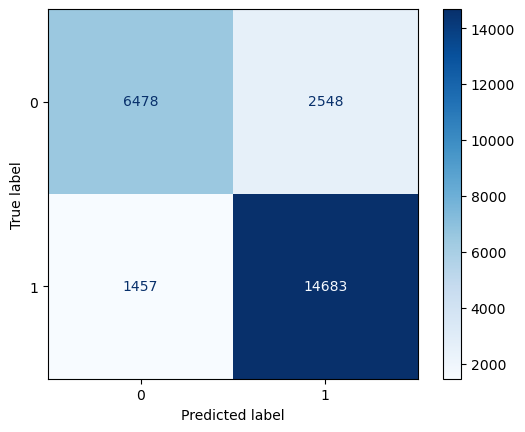

In [72]:
# Predict the target values for X_test
Y_pred = sgd_clf.predict(X_test)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred)
display = ConfusionMatrixDisplay(cm)
display.plot(cmap='Blues')

In [76]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score
print('Precision:',precision_score(Y_test, Y_pred))
print('Recall:',recall_score(Y_test, Y_pred))

Precision: 0.8521269804422262
Recall: 0.909727385377943


In [77]:
#F1 score
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred)

0.8799856162536333

In [81]:
# Binary Classifier
from sklearn.linear_model import SGDClassifier
# Initialize and train the SGDClassifier
sgd_clf = SGDClassifier(max_iter=10, loss='log_loss') #WE CHANGED THE LOSS FUNCTION
sgd_clf.fit(X_train, Y_train)

# Evaluate the classifier
accuracy = sgd_clf.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8341015656043869


In [73]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the Multinomial Naive Bayes classifier
nb_clf = MultinomialNB()
nb_clf.fit(X_train, Y_train)

# Predict the target values for X_test
Y_pred_nb = nb_clf.predict(X_test)

# Evaluate the classifier
accuracy_nb = nb_clf.score(X_test, Y_test)
print("Accuracy (Naive Bayes):", accuracy_nb)


Accuracy (Naive Bayes): 0.7733052531192879
